<a href="https://colab.research.google.com/github/agrigoridou/Tokenization-Zipf-s-Law-N-gram-Models/blob/main/%CE%91_Tokens%2C_Types%2C_Zipf%E2%80%99s_Law_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Œ†œÅŒøŒ±œÄŒ±ŒπœÑŒøœçŒºŒµŒΩŒµœÇ Œ≤ŒπŒ≤ŒªŒπŒøŒ∏ŒÆŒ∫ŒµœÇ

In [ ]:
# ŒïŒ≥Œ∫Œ±œÑŒ¨œÉœÑŒ±œÉŒ∑ œÑœâŒΩ Œ≤ŒπŒ≤ŒªŒπŒøŒ∏Œ∑Œ∫œéŒΩ
!pip install nltk spacy transformers
!python -m spacy download en_core_web_sm


     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12.8/12.8 MB 59.4 MB/s eta 0:00:00
‚úî Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
‚ö† Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


# Œ¶œåœÅœÑœâœÉŒ∑ œÑŒøœÖ Œ±œÅœáŒµŒØŒøœÖ

In [41]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
with open("/content/drive/MyDrive/Tokenization-Zipf-s-Law-N-gram-Models/wsj_untokenized.txt", "r") as file:
    text = file.read()


In [43]:
# ŒïŒªŒ≠Œ≥œáŒøœÖŒºŒµ Œ±ŒΩ œÑŒø Œ∫ŒµŒØŒºŒµŒΩŒø Œ¥ŒπŒ±Œ≤Œ¨Œ∂ŒµœÑŒ±Œπ œÉœâœÉœÑŒ¨
print(f"ŒöŒµŒØŒºŒµŒΩŒø Œ±œÄœå œÑŒø Œ±œÅœáŒµŒØŒø:\n{text[:500]}...")  # ŒïŒ∫œÑœçœÄœâœÉŒ∑ œÄœÅœéœÑœâŒΩ 500 œáŒ±œÅŒ±Œ∫œÑŒÆœÅœâŒΩ Œ≥ŒπŒ± Œ≠ŒªŒµŒ≥œáŒø


ŒöŒµŒØŒºŒµŒΩŒø Œ±œÄœå œÑŒø Œ±œÅœáŒµŒØŒø:
 Pierre Vinken, 61 years old, will join the board as a nonexecutive director Nov. 29. Mr. Vinken is chairman of Elsevier N.V., the Dutch publishing group. Rudolph Agnew, 55 years old and former chairman of Consolidated Gold Fields PLC, was named a nonexecutive director of this British industrial conglomerate. A form of asbestos once used to make Kent cigarette filters has caused a high percentage of cancer deaths among a group of workers exposed to it more than 30 years ago, researchers reported...


In [ ]:
#e.x
text = "to be or not to be"

# Tokenization ŒºŒµ NLTK, spaCy Œ∫Œ±Œπ HuggingFace

## NLTK Tokenization

ŒßœÅŒÆœÉŒ∑ œÑŒøœÖ nltk.word_tokenize() Œ±œÄœå œÑŒø NLTK

In [44]:
import nltk
nltk.download('punkt_tab')


from nltk.tokenize import word_tokenize

# Tokenization ŒºŒµ NLTK
tokens_nltk = word_tokenize(text)
types_nltk = set(tokens_nltk)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Œ£œÑŒø œÄŒ±œÅŒ±œÄŒ¨ŒΩœâ œÄŒ±œÅŒ¨Œ¥ŒµŒπŒ≥ŒºŒ±, œÄœÅœéœÑŒ± Œ∫Œ±œÑŒµŒ≤Œ¨Œ∂ŒøœÖŒºŒµ œÑŒø Œ±œÄŒ±œÅŒ±ŒØœÑŒ∑œÑŒø œÄŒ±Œ∫Œ≠œÑŒø 'punkt' Œ±œÄœå œÑŒø NLTK, Œ∫Œ±Œπ œÉœÑŒ∑ œÉœÖŒΩŒ≠œáŒµŒπŒ± ŒµœÜŒ±œÅŒºœåŒ∂ŒøœÖŒºŒµ œÑŒø word_tokenize Œ≥ŒπŒ± œÑŒøŒΩ œÑŒµŒºŒ±œáŒπœÉŒºœå œÑŒøœÖ Œ∫ŒµŒπŒºŒ≠ŒΩŒøœÖ. Œ§Œø Œ±œÄŒøœÑŒ≠ŒªŒµœÉŒºŒ± Œ±œÄŒøŒ∏Œ∑Œ∫ŒµœçŒµœÑŒ±Œπ œÉœÑŒøŒΩ œÄŒØŒΩŒ±Œ∫Œ± tokens_nltk, ŒµŒΩœé œÑŒ± ŒºŒøŒΩŒ±Œ¥ŒπŒ∫Œ¨ tokens Œ±œÄŒøŒ∏Œ∑Œ∫ŒµœçŒøŒΩœÑŒ±Œπ œÉœÑŒø types_nltk.

## spaCy Tokenization

ŒßœÅŒÆœÉŒ∑ œÑŒøœÖ en_core_web_sm ŒºŒøŒΩœÑŒ≠ŒªŒøœÖ Œ±œÄœå œÑŒø spaCy

In [45]:
import spacy

# Œ¶œåœÅœÑœâŒºŒ± œÑŒøœÖ spaCy ŒºŒøŒΩœÑŒ≠ŒªŒøœÖ
nlp = spacy.load("en_core_web_sm")

# Tokenization ŒºŒµ spaCy
doc = nlp(text)
tokens_spacy = [token.text for token in doc]
types_spacy = set(tokens_spacy)


Œ£Œµ Œ±œÖœÑŒÆ œÑŒ∑ ŒºŒ≠Œ∏ŒøŒ¥Œø, œÜŒøœÅœÑœéŒΩŒøœÖŒºŒµ œÑŒø ŒºŒøŒΩœÑŒ≠ŒªŒø Œ∫Œ±Œπ œÉœÑŒ∑ œÉœÖŒΩŒ≠œáŒµŒπŒ± Œ¥Œ∑ŒºŒπŒøœÖœÅŒ≥ŒøœçŒºŒµ œÑŒø Œ±ŒΩœÑŒπŒ∫ŒµŒØŒºŒµŒΩŒø doc, œÑŒø ŒøœÄŒøŒØŒø œÄŒµœÅŒπŒ≠œáŒµŒπ œÑŒ± tokens œÑŒøœÖ Œ∫ŒµŒπŒºŒ≠ŒΩŒøœÖ. Œü œÑŒµŒºŒ±œáŒπœÉŒºœåœÇ Œ≥ŒØŒΩŒµœÑŒ±Œπ ŒºŒ≠œÉœâ œÑŒ∑œÇ Œ±ŒΩŒ±ŒªœÖœÑŒπŒ∫ŒÆœÇ ŒªŒµŒπœÑŒøœÖœÅŒ≥ŒØŒ±œÇ œÑŒøœÖ spaCy.

## BERT Tokenization

ŒßœÅŒÆœÉŒ∑ œÑŒøœÖ BertTokenizer Œ±œÄœå œÑŒø HuggingFace

In [46]:
from transformers import BertTokenizer

# Œ¶œåœÅœÑœâŒºŒ± œÑŒøœÖ BERT Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

# Tokenization ŒºŒµ HuggingFace BERT
tokens_bert = tokenizer.tokenize(text)
types_bert = set(tokens_bert)


Œü BertTokenizer Œ¥Œ∑ŒºŒπŒøœÖœÅŒ≥ŒµŒØ tokens œáœÅŒ∑œÉŒπŒºŒøœÄŒøŒπœéŒΩœÑŒ±œÇ œÑŒø ŒªŒµŒæŒπŒªœåŒ≥ŒπŒø œÑŒøœÖ BERT Œ∫Œ±Œπ œÑŒ∑ ŒºŒ≠Œ∏ŒøŒ¥Œø byte-pair encoding (BPE), Œ∑ ŒøœÄŒøŒØŒ± ŒµœÄŒπœÑœÅŒ≠œÄŒµŒπ œÑŒøŒΩ œÑŒµŒºŒ±œáŒπœÉŒºœå œÉŒµ œÖœÄŒøŒªŒ≠ŒæŒµŒπœÇ.

# 1. Œ†ŒØŒΩŒ±Œ∫ŒµœÇ ŒºŒµ Tokens Œ∫Œ±Œπ Types


In [47]:
import math
import pandas as pd

# ŒîŒ∑ŒºŒπŒøœÖœÅŒ≥ŒØŒ± œÄŒØŒΩŒ±Œ∫Œ± ŒºŒµ œÑŒ± Œ±œÄŒøœÑŒµŒªŒ≠œÉŒºŒ±œÑŒ±
data = {
    'Method': ['NLTK', 'spaCy', 'BERT'],
    'Tokens Count': [len(tokens_nltk), len(tokens_spacy), len(tokens_bert)],
    'Types Count': [len(types_nltk), len(types_spacy), len(types_bert)],
}

df = pd.DataFrame(data)
df


Method  Tokens Count  Types Count
0   NLTK         93530        12000
1  spaCy         95894        11477
2   BERT        112325        10266

ŒëœÖœÑœåœÇ Œø œÄŒØŒΩŒ±Œ∫Œ±œÇ ŒºŒ±œÇ Œ¥ŒµŒØœáŒΩŒµŒπ œÑŒø œÄŒªŒÆŒ∏ŒøœÇ œÑœâŒΩ tokens Œ∫Œ±Œπ types œÄŒøœÖ œÄŒ±œÅŒ¨Œ≥ŒøŒΩœÑŒ±Œπ Œ±œÄœå Œ∫Œ¨Œ∏Œµ ŒºŒ≠Œ∏ŒøŒ¥Œø. Œ§Œ± Œ±œÄŒøœÑŒµŒªŒ≠œÉŒºŒ±œÑŒ± Œ±œÖœÑŒ¨ ŒµŒØŒΩŒ±Œπ œáœÅŒÆœÉŒπŒºŒ± Œ≥ŒπŒ± ŒΩŒ± Œ∫Œ±œÑŒ±ŒΩŒøŒÆœÉŒøœÖŒºŒµ œÑŒ∑ Œ¥ŒπŒ±œÜŒøœÅŒ¨ œÉœÑŒπœÇ ŒºŒµŒ∏œåŒ¥ŒøœÖœÇ tokenization, ŒµŒπŒ¥ŒπŒ∫Œ¨ œåœÉŒøŒΩ Œ±œÜŒøœÅŒ¨ œÑŒø œÄŒªŒÆŒ∏ŒøœÇ œÑœâŒΩ ŒºŒøŒΩŒ±Œ¥ŒπŒ∫œéŒΩ tokens (types).

# 2. Œ§œÖœáŒ±ŒØŒ± œÄœÅœåœÑŒ±œÉŒ∑ Œ∫Œ±Œπ œÑŒ± Tokens

ŒïœÄŒπŒªŒ≠Œ≥ŒøœÖŒºŒµ ŒºŒØŒ± œÑœÖœáŒ±ŒØŒ± œÄœÅœåœÑŒ±œÉŒ∑ ŒºŒµ œÑŒøœÖŒªŒ¨œáŒπœÉœÑŒøŒΩ 10 tokens Œ∫Œ±Œπ œÄŒ±œÅŒ±Œ∏Œ≠œÑŒøœÖŒºŒµ œÑŒ± tokens Œ≥ŒπŒ± Œ∫Œ¨Œ∏Œµ ŒºŒ≠Œ∏ŒøŒ¥Œø tokenization.

In [68]:
import pandas as pd

# ŒïœÄŒπŒªŒøŒ≥ŒÆ œÑœÖœáŒ±ŒØŒ±œÇ œÄœÅœåœÑŒ±œÉŒ∑œÇ ŒºŒµ œÑŒøœÖŒªŒ¨œáŒπœÉœÑŒøŒΩ 10 tokens
sentences = text.split('.')  # ŒîŒπŒ±œáœâœÅŒØŒ∂ŒøœÖŒºŒµ œÑŒø Œ∫ŒµŒØŒºŒµŒΩŒø œÉŒµ œÄœÅŒøœÑŒ¨œÉŒµŒπœÇ
random_sentence = random.choice([s for s in sentences if len(s.split()) >= 10])  # ŒïœÄŒπŒªŒøŒ≥ŒÆ œÄœÅœåœÑŒ±œÉŒ∑œÇ ŒºŒµ œÑŒøœÖŒªŒ¨œáŒπœÉœÑŒøŒΩ 10 tokens

# Tokenization œÑŒ∑œÇ œÑœÖœáŒ±ŒØŒ±œÇ œÄœÅœåœÑŒ±œÉŒ∑œÇ ŒºŒµ œÑŒπœÇ œÑœÅŒµŒπœÇ ŒºŒµŒ∏œåŒ¥ŒøœÖœÇ
tokens_random_nltk = word_tokenize(random_sentence)  # Tokenization ŒºŒµ NLTK
tokens_random_spacy = [token.text for token in nlp(random_sentence)]  # Tokenization ŒºŒµ spaCy
tokens_random_bert = tokenizer.tokenize(random_sentence)  # Tokenization ŒºŒµ BERT

# ŒîŒ∑ŒºŒπŒøœÖœÅŒ≥ŒØŒ± œÑŒøœÖ œÄŒØŒΩŒ±Œ∫Œ± ŒºŒµ pandas
data  = {
    "Method": ["NLTK", "spaCy", "BERT"],
    "Tokens": [tokens_random_nltk, tokens_random_spacy, tokens_random_bert]
}

# ŒïŒ∫œÑœçœÄœâœÉŒ∑ œÑŒ∑œÇ œÑœÖœáŒ±ŒØŒ±œÇ œÄœÅœåœÑŒ±œÉŒ∑œÇ Œ∫Œ±Œπ œÑŒøœÖ œÄŒØŒΩŒ±Œ∫Œ± ŒºŒµ œÑŒ± tokens
print(f"Random sentence: {random_sentence}")
print("\nTokens for each method:")

df = pd.DataFrame(data)
df


Random sentence:  Under that law, parties proposing mergers or acquisitions valued at $15 million or more must notify FTC and Justice Department antitrust regulators before completing the transactions

Tokens for each method:


Method                                             Tokens
0   NLTK  [Under, that, law, ,, parties, proposing, merg...
1  spaCy  [ , Under, that, law, ,, parties, proposing, m...
2   BERT  [Under, that, law, ,, parties, proposing, merg...

# 3. Œ†ŒØŒΩŒ±Œ∫Œ±œÇ ŒºŒµ œÑŒ± 20 œÄŒπŒø œÉœÖœáŒΩŒ¨ Types

ŒëŒ∫ŒøŒªŒøœÖŒ∏ŒµŒØ Œ∑ Œ±ŒΩŒ¨ŒªœÖœÉŒ∑ Œ≥ŒπŒ± œÑŒπœÇ 20 œÄŒπŒø œÉœÖœáŒΩŒ≠œÇ ŒªŒ≠ŒæŒµŒπœÇ (types) Œ≥ŒπŒ± Œ∫Œ¨Œ∏Œµ ŒºŒ≠Œ∏ŒøŒ¥Œø tokenization, œÑŒ±ŒæŒπŒΩŒøŒºŒ∑ŒºŒ≠ŒΩŒµœÇ Œ∫Œ±œÑŒ¨ œÜŒ∏ŒØŒΩŒøœÖœÉŒ± œÉœÖœáŒΩœåœÑŒ∑œÑŒ±.

In [64]:
from collections import Counter
import pandas as pd

# Œ•œÄŒøŒªŒøŒ≥ŒπœÉŒºœåœÇ œÉœÖœáŒΩŒøœÑŒÆœÑœâŒΩ
freq_nltk = Counter(tokens_nltk)
freq_spacy = Counter(tokens_spacy)
freq_bert = Counter(tokens_bert)

# 20 œÄŒπŒø œÉœÖœáŒΩŒ¨ types Œ≥ŒπŒ± Œ∫Œ¨Œ∏Œµ ŒºŒ≠Œ∏ŒøŒ¥Œø
top_20_nltk = freq_nltk.most_common(20)
top_20_spacy = freq_spacy.most_common(20)
top_20_bert = freq_bert.most_common(20)

# Œ£œÖŒΩŒ¨œÅœÑŒ∑œÉŒ∑ Œ≥ŒπŒ± œÑŒ∑ŒΩ Œ¥Œ∑ŒºŒπŒøœÖœÅŒ≥ŒØŒ± œÑŒøœÖ œÄŒØŒΩŒ±Œ∫Œ±
def create_frequency_table(top_20, method):
    total_tokens = sum([count for _, count in top_20])  # Œ£œÖŒΩŒøŒªŒπŒ∫œåœÇ Œ±œÅŒπŒ∏ŒºœåœÇ tokens
    data = []

    for index, (word, count) in enumerate(top_20, start=1):
        probability = count / total_tokens  # Œ•œÄŒøŒªŒøŒ≥ŒπœÉŒºœåœÇ œÄŒπŒ∏Œ±ŒΩœåœÑŒ∑œÑŒ±œÇ
        product = index * probability  # Œ•œÄŒøŒªŒøŒ≥ŒπœÉŒºœåœÇ Œ≥ŒπŒΩŒøŒºŒ≠ŒΩŒøœÖ
        data.append([word, count, probability, product])

    df = pd.DataFrame(data, columns=['Type', 'Frequency', 'Probability', 'Index * Probability'])
    df['Method'] = method  # Œ†œÅŒøœÉŒ∏ŒÆŒ∫Œ∑ œÉœÑŒÆŒªŒ∑œÇ ŒºŒµ œÑŒ∑ ŒºŒ≠Œ∏ŒøŒ¥Œø
    return df

# ŒîŒ∑ŒºŒπŒøœÖœÅŒ≥ŒØŒ± œÄŒπŒΩŒ¨Œ∫œâŒΩ Œ≥ŒπŒ± Œ∫Œ¨Œ∏Œµ ŒºŒ≠Œ∏ŒøŒ¥Œø
df_nltk = create_frequency_table(top_20_nltk, 'NLTK')
df_spacy = create_frequency_table(top_20_spacy, 'spaCy')
df_bert = create_frequency_table(top_20_bert, 'BERT')

# Œ£œÖŒΩŒ≠ŒΩœâœÉŒ∑ œåŒªœâŒΩ œÑœâŒΩ œÄŒπŒΩŒ¨Œ∫œâŒΩ
df_all = pd.concat([df_nltk, df_spacy, df_bert], ignore_index=True)

# ŒïŒ∫œÑœçœÄœâœÉŒ∑ œÑŒøœÖ œÑŒµŒªŒπŒ∫Œøœç œÄŒØŒΩŒ±Œ∫Œ±
df_all


Type  Frequency  Probability  Index * Probability Method
0      ,       4823     0.160435             0.160435   NLTK
1    the       4041     0.134422             0.268844   NLTK
2      .       3819     0.127037             0.381112   NLTK
3     of       2312     0.076908             0.307631   NLTK
4     to       2157     0.071752             0.358759   NLTK
5      a       1857     0.061772             0.370634   NLTK
6     in       1563     0.051993             0.363948   NLTK
7    and       1489     0.049531             0.396248   NLTK
8     ''        959     0.031901             0.287107   NLTK
9     's        863     0.028707             0.287073   NLTK
10   for        815     0.027111             0.298217   NLTK
11  that        807     0.026845             0.322134   NLTK
12   The        714     0.023751             0.308762   NLTK
13     $        708     0.023551             0.329719   NLTK
14    is        671     0.022321             0.334808   NLTK
15  said        627     0.020857             0.333710   NLTK
16    on        489     0.016266             0.276529   NLTK
17    it        475     0.015801             0.284412   NLTK
18     %        446     0.014836             0.281884   NLTK
19    by        427     0.014204             0.284080   NLTK
20     ,       4823     0.154292             0.154292  spaCy
21   the       4047     0.129467             0.258933  spaCy
22     .       3761     0.120317             0.360952  spaCy
23    of       2313     0.073995             0.295979  spaCy
24    to       2162     0.069164             0.345820  spaCy
25     a       1868     0.059759             0.358553  spaCy
26    in       1576     0.050417             0.352922  spaCy
27   and       1496     0.047858             0.382866  spaCy
28    ''       1372     0.043891             0.395022  spaCy
29     -       1231     0.039381             0.393807  spaCy
30    's        863     0.027608             0.303689  spaCy
31   for        815     0.026072             0.312870  spaCy
32  that        807     0.025817             0.335615  spaCy
33   The        714     0.022841             0.319780  spaCy
34     $        702     0.022458             0.336863  spaCy
35    is        671     0.021466             0.343453  spaCy
36  said        627     0.020058             0.340990  spaCy
37    on        491     0.015707             0.282735  spaCy
38    it        476     0.015228             0.289325  spaCy
39     %        444     0.014204             0.284078  spaCy
40     .       6363     0.168869             0.168869   BERT
41     ,       5026     0.133386             0.266773   BERT
42     '       4117     0.109262             0.327787   BERT
43   the       4049     0.107458             0.429830   BERT
44    of       2314     0.061412             0.307059   BERT
45    to       2167     0.057511             0.345064   BERT
46     a       1927     0.051141             0.357988   BERT
47     -       1733     0.045993             0.367941   BERT
48    in       1600     0.042463             0.382166   BERT
49   and       1498     0.039756             0.397558   BERT
50     s        932     0.024735             0.272081   BERT
51   for        815     0.021630             0.259554   BERT
52  that        807     0.021417             0.278424   BERT
53   The        715     0.018976             0.265658   BERT
54     $        708     0.018790             0.281847   BERT
55   ##s        686     0.018206             0.291295   BERT
56    is        628     0.016667             0.283333   BERT
57  said        627     0.016640             0.299522   BERT
58    on        492     0.013057             0.248089   BERT
59    it        476     0.012633             0.252654   BERT

# 4. Œ†ŒøœÉŒøœÉœÑŒ¨ œÑœâŒΩ Types œÄŒøœÖ ŒµŒºœÜŒ±ŒΩŒØŒ∂ŒøŒΩœÑŒ±Œπ 1, 2, ŒÆ 3 œÜŒøœÅŒ≠œÇ


Œ•œÄŒøŒªŒøŒ≥ŒØŒ∂ŒøœÖŒºŒµ œÑŒ± œÄŒøœÉŒøœÉœÑŒ¨ œÑœâŒΩ types œÄŒøœÖ ŒµŒºœÜŒ±ŒΩŒØŒ∂ŒøŒΩœÑŒ±Œπ Œ±Œ∫œÅŒπŒ≤œéœÇ ŒºŒØŒ±, Œ¥œçŒø ŒÆ œÑœÅŒµŒπœÇ œÜŒøœÅŒ≠œÇ, Œ∫Œ±Œπ œÑŒ± œÉœÖŒ≥Œ∫œÅŒØŒΩŒøœÖŒºŒµ ŒºŒµ œÑŒπœÇ œÄœÅŒøŒ≤ŒªŒ≠œàŒµŒπœÇ œÑŒøœÖ ŒùœåŒºŒøœÖ œÑŒøœÖ Zipf.

In [65]:
import pandas as pd

def zipf_prediction(n):
    return 1 / (n * (n + 1))

def calculate_percentages(freq):
    one_time = sum(1 for count in freq.values() if count == 1)
    two_times = sum(1 for count in freq.values() if count == 2)
    three_times = sum(1 for count in freq.values() if count == 3)

    total_types = len(freq)
    return {
        '1 time': one_time / total_types * 100,
        '2 times': two_times / total_types * 100,
        '3 times': three_times / total_types * 100,
    }

# Œ•œÄŒøŒªŒøŒ≥ŒπœÉŒºœåœÇ Œ≥ŒπŒ± Œ∫Œ¨Œ∏Œµ ŒºŒ≠Œ∏ŒøŒ¥Œø
percentages_nltk = calculate_percentages(freq_nltk)
percentages_spacy = calculate_percentages(freq_spacy)
percentages_bert = calculate_percentages(freq_bert)

# Œ†œÅŒøŒ≤ŒªŒ≠œàŒµŒπœÇ ŒùœåŒºŒøœÖ Zipf Œ≥ŒπŒ± 1, 2, 3 œÜŒøœÅŒ≠œÇ
zipf_predictions = {
    '1 time': zipf_prediction(1),
    '2 times': zipf_prediction(2),
    '3 times': zipf_prediction(3),
}

# ŒîŒ∑ŒºŒπŒøœÖœÅŒ≥ŒØŒ± œÄŒØŒΩŒ±Œ∫Œ± ŒºŒµ pandas Œ≥ŒπŒ± œÑŒ± Œ±œÄŒøœÑŒµŒªŒ≠œÉŒºŒ±œÑŒ±
data = {
    'Method': ['NLTK', 'spaCy', 'BERT'],
    '1 time (%)': [percentages_nltk['1 time'], percentages_spacy['1 time'], percentages_bert['1 time']],
    '2 times (%)': [percentages_nltk['2 times'], percentages_spacy['2 times'], percentages_bert['2 times']],
    '3 times (%)': [percentages_nltk['3 times'], percentages_spacy['3 times'], percentages_bert['3 times']],
    'Zipf 1 time (%)': [zipf_predictions['1 time'] * 100, zipf_predictions['1 time'] * 100, zipf_predictions['1 time'] * 100],
    'Zipf 2 times (%)': [zipf_predictions['2 times'] * 100, zipf_predictions['2 times'] * 100, zipf_predictions['2 times'] * 100],
    'Zipf 3 times (%)': [zipf_predictions['3 times'] * 100, zipf_predictions['3 times'] * 100, zipf_predictions['3 times'] * 100],
}

df = pd.DataFrame(data)
df


Method  1 time (%)  2 times (%)  3 times (%)  Zipf 1 time (%)  \
0   NLTK   52.116667    15.250000     7.525000             50.0   
1  spaCy   50.065348    15.596410     7.702361             50.0   
2   BERT   37.512176    16.793298     9.244107             50.0   

   Zipf 2 times (%)  Zipf 3 times (%)  
0         16.666667          8.333333  
1         16.666667          8.333333  
2         16.666667          8.333333

# 5. ŒîŒπŒ¨Œ≥œÅŒ±ŒºŒºŒ± œÑŒøœÖ ŒùœåŒºŒøœÖ œÑŒøœÖ Zipf

ŒîŒ∑ŒºŒπŒøœÖœÅŒ≥ŒøœçŒºŒµ Œ≠ŒΩŒ± Œ¥ŒπŒ¨Œ≥œÅŒ±ŒºŒºŒ± œÄŒøœÖ œÉœÖŒ≥Œ∫œÅŒØŒΩŒµŒπ œÑŒπœÇ œÄœÅŒ±Œ≥ŒºŒ±œÑŒπŒ∫Œ≠œÇ œÉœÖœáŒΩœåœÑŒ∑œÑŒµœÇ œÑœâŒΩ types ŒºŒµ œÑŒπœÇ œÄœÅŒøŒ≤ŒªŒ≠œàŒµŒπœÇ œÑŒøœÖ ŒùœåŒºŒøœÖ œÑŒøœÖ Zipf Œ≥ŒπŒ± Œ¥ŒπŒ±œÜŒøœÅŒµœÑŒπŒ∫Œ≠œÇ œÑŒπŒºŒ≠œÇ œÑŒøœÖ œÄŒ±œÅŒ¨Œ≥ŒøŒΩœÑŒ±
ùõº.

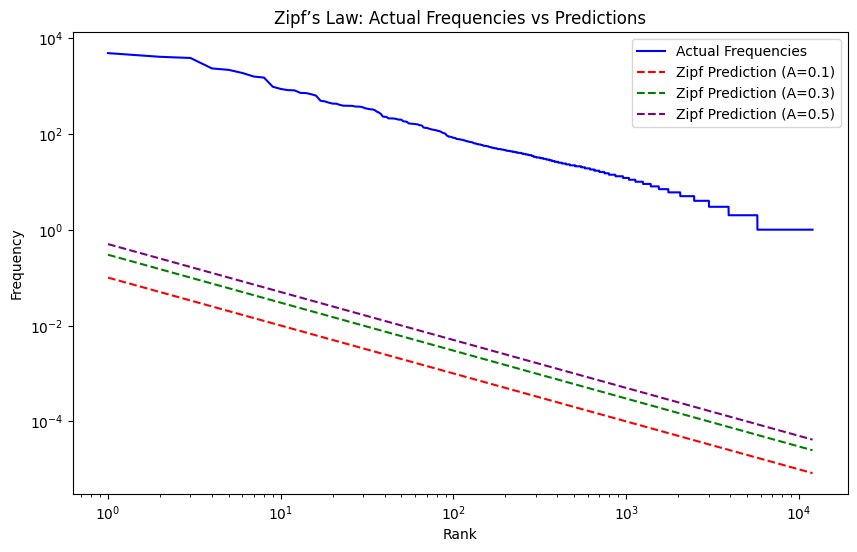

In [67]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Œ•œÄŒøŒ∏Œ≠œÑŒøœÖŒºŒµ œåœÑŒπ freq_nltk ŒµŒØŒΩŒ±Œπ œÑŒø Counter Œ±ŒΩœÑŒπŒ∫ŒµŒØŒºŒµŒΩŒø œÄŒøœÖ œÄŒµœÅŒπŒ≠œáŒµŒπ œÑŒπœÇ œÉœÖœáŒΩœåœÑŒ∑œÑŒµœÇ œÑœâŒΩ types
# ŒëŒΩ Œ¥ŒµŒΩ œÑŒø Œ≠œáŒµŒπœÇ ŒÆŒ¥Œ∑, ŒºœÄŒøœÅŒµŒØœÇ ŒΩŒ± œÑŒø Œ¥Œ∑ŒºŒπŒøœÖœÅŒ≥ŒÆœÉŒµŒπœÇ ŒºŒµ œÑŒøŒΩ ŒµŒæŒÆœÇ œÑœÅœåœÄŒø:
# freq_nltk = Counter(tokens_nltk)  # Œ•œÄŒøŒ∏Œ≠œÑŒøŒΩœÑŒ±œÇ œåœÑŒπ tokens_nltk ŒµŒØŒΩŒ±Œπ ŒøŒπ ŒªŒ≠ŒæŒµŒπœÇ œÑŒøœÖ Œ∫ŒµŒπŒºŒ≠ŒΩŒøœÖ

# ŒõŒøŒ≥Œ±œÅŒπŒ∏ŒºŒπŒ∫Œ≠œÇ œÉœÖœáŒΩœåœÑŒ∑œÑŒµœÇ Œ∫Œ±Œπ œÄœÅŒøŒ≤ŒªŒ≠œàŒµŒπœÇ œÑŒøœÖ ŒùœåŒºŒøœÖ œÑŒøœÖ Zipf
def zipf_predictions(alpha, num_types):
    ranks = np.arange(1, num_types + 1)
    frequencies = alpha / ranks
    return frequencies

# Œ•œÄŒøŒªŒøŒ≥ŒπœÉŒºœåœÇ œÑœâŒΩ œÄœÅŒ±Œ≥ŒºŒ±œÑŒπŒ∫œéŒΩ œÉœÖœáŒΩŒøœÑŒÆœÑœâŒΩ Œ∫Œ±Œπ œÑŒ±ŒæŒπŒΩœåŒºŒ∑œÉŒ∑ Œ∫Œ±œÑŒ¨ œÜŒ∏ŒØŒΩŒøœÖœÉŒ± œÉŒµŒπœÅŒ¨
ranks = np.arange(1, len(freq_nltk) + 1)
actual_frequencies_nltk = [count for _, count in freq_nltk.most_common(len(freq_nltk))]

# ŒîŒ∑ŒºŒπŒøœÖœÅŒ≥ŒØŒ± Œ¥ŒπŒ±Œ≥œÅŒ¨ŒºŒºŒ±œÑŒøœÇ
plt.figure(figsize=(10, 6))
plt.plot(ranks, actual_frequencies_nltk, label='Actual Frequencies', color='blue')

# Œ†œÅŒøŒ≤ŒªŒ≠œàŒµŒπœÇ œÑŒøœÖ ŒùœåŒºŒøœÖ œÑŒøœÖ Zipf Œ≥ŒπŒ± Œ¥ŒπŒ¨œÜŒøœÅŒµœÇ œÑŒπŒºŒ≠œÇ œÑŒøœÖ œÄŒ±œÅŒ¨Œ≥ŒøŒΩœÑŒ± A
plt.plot(ranks, zipf_predictions(0.1, len(freq_nltk)), label='Zipf Prediction (A=0.1)', color='red', linestyle='dashed')
plt.plot(ranks, zipf_predictions(0.3, len(freq_nltk)), label='Zipf Prediction (A=0.3)', color='green', linestyle='dashed')
plt.plot(ranks, zipf_predictions(0.5, len(freq_nltk)), label='Zipf Prediction (A=0.5)', color='purple', linestyle='dashed')

# Œ°œÖŒ∏ŒºŒØœÉŒµŒπœÇ Œ≥œÅŒ±œÜŒÆŒºŒ±œÑŒøœÇ
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.legend()
plt.title('Zipf‚Äôs Law: Actual Frequencies vs Predictions')

# ŒïŒºœÜŒ¨ŒΩŒπœÉŒ∑ œÑŒøœÖ Œ≥œÅŒ±œÜŒÆŒºŒ±œÑŒøœÇ
plt.show()


Œó œÄœÅœåŒ≤ŒªŒµœàŒ∑ ŒºŒµ A=0.5 ŒµŒØŒΩŒ±Œπ œÄŒπŒø Œ∫ŒøŒΩœÑŒ¨ œÉœÑŒπœÇ œÄœÅŒ±Œ≥ŒºŒ±œÑŒπŒ∫Œ≠œÇ ŒºŒµœÑœÅŒÆœÉŒµŒπœÇ. ŒëœÖœÑœå œÄœÅŒøŒ∫œçœÄœÑŒµŒπ Œ±œÄœå œÑŒø Œ¥ŒπŒ¨Œ≥œÅŒ±ŒºŒºŒ± œåœÄŒøœÖ Œ∑ Œ≥œÅŒ±ŒºŒºŒÆ Œ≥ŒπŒ± A=0.5 Œ±Œ∫ŒøŒªŒøœÖŒ∏ŒµŒØ œÄŒπŒø œÉœÑŒµŒΩŒ¨ œÑŒ∑ŒΩ Œ∫Œ±ŒºœÄœçŒªŒ∑ œÑœâŒΩ œÄœÅŒ±Œ≥ŒºŒ±œÑŒπŒ∫œéŒΩ œÉœÖœáŒΩŒøœÑŒÆœÑœâŒΩ.Œ£œÖŒ≥Œ∫œÅŒØŒΩŒøŒΩœÑŒ±œÇ œÑŒπœÇ Œ¥ŒπŒ±œÜŒøœÅŒµœÑŒπŒ∫Œ≠œÇ Œ≥œÅŒ±ŒºŒºŒ≠œÇ Œ≥ŒπŒ± œÑŒ± A = 0.1, A = 0.3, A = 0.5 œÄŒ±œÅŒ±œÑŒ∑œÅŒøœçŒºŒµ œåœÑŒπ œåœÉŒø ŒºŒπŒ∫œÅœåœÑŒµœÅŒø ŒµŒØŒΩŒ±Œπ œÑŒø A, œÑœåœÉŒø œÄŒπŒø Œ±œÄœåœÑŒøŒºŒ∑ ŒµŒØŒΩŒ±Œπ Œ∑ œÄœÑœéœÉŒ∑ œÑœâŒΩ œÉœÖœáŒΩŒøœÑŒÆœÑœâŒΩ. ŒëŒΩœÑŒØŒ∏ŒµœÑŒ±, Œ∑ Œ≥œÅŒ±ŒºŒºŒÆ ŒºŒµ A=0.5 œÄŒ±œÅŒøœÖœÉŒπŒ¨Œ∂ŒµŒπ ŒºŒπŒ± œÄŒπŒø ŒÆœÄŒπŒ± œÄœÑœéœÉŒ∑, Œ∑ ŒøœÄŒøŒØŒ± œÑŒ±ŒπœÅŒπŒ¨Œ∂ŒµŒπ Œ∫Œ±ŒªœçœÑŒµœÅŒ± ŒºŒµ œÑŒ∑ŒΩ œÄœÅŒ±Œ≥ŒºŒ±œÑŒπŒ∫ŒÆ Œ∫Œ±œÑŒ±ŒΩŒøŒºŒÆ œÑœâŒΩ œÉœÖœáŒΩŒøœÑŒÆœÑœâŒΩ œÉœÑŒø Œ∫ŒµŒØŒºŒµŒΩŒø, œåœÄŒøœÖ Œ∑ œÉœÖœáŒΩœåœÑŒ∑œÑŒ± œÑœâŒΩ ŒªŒ≠ŒæŒµœâŒΩ Œ¥ŒµŒΩ ŒºŒµŒπœéŒΩŒµœÑŒ±Œπ œÑœåœÉŒø Œ±œÄœåœÑŒøŒºŒ±.



